<a href="https://colab.research.google.com/github/anursen/car_price_prediction/blob/main/prius_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing The Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV

#Importing The Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/scraper.csv')

In [ ]:
df.shape

(1547, 11)

In [ ]:
df

,Unnamed: 0,Vin,Years,Price,Make,Model,Mileage,Condition,Usage Type,Owner#,Location
0,0,JTDKBRFU2J3597945,2018,27637,Toyota,Prius Two FWD,29801,Accident check\nNo issues reported,NaN,2.0,CA
1,1,JTDKBRFU3H3046109,2017,24500,Toyota,Prius Two FWD,16565,Accident check\nNo issues reported,NaN,1.0,CA
2,2,JTDKN3DU7B1380816,2011,11988,Toyota,Prius Three,94506,Accident check\n1Accident reported,NaN,1.0,CA
3,3,JTDKN3DU0F0473253,2015,14199,Toyota,Prius Two,77651,Accident check\nNo issues reported,NaN,1.0,CA
4,4,JTDKN3DU9A0049210,2010,6990,Toyota,Prius,141175,Accident check\nNo issues reported,NaN,1.0,HI
...,...,...,...,...,...,...,...,...,...,...,...
1542,1542,JTDKARFU7H3043006,2017,22995,Toyota,Prius Four FWD,63442,Accident check\nNo issues reported,NaN,2.0,OH
1543,1543,JTDKN3DU9F1896794,2015,19554,Toyota,Prius Four,52803,Accident check\n1Accident reported,NaN,4.0,NY
1544,1544,JTDKARFU4J3065308,2018,27966,Toyota,Prius Four Touring FWD,39675,Accident check\nNo issues reported,NaN,1.0,IL
1545,1545,JTDKN3DU0B1399238,2011,6995,Toyota,Prius Five,161656,Accident check\n1Accident reported,NaN,5.0,VA


In [ ]:
df.rename(columns={"Unnamed: 0": "#"},inplace=True)

In [ ]:
df.set_index('#',inplace=True)

In [ ]:
df.columns

Index(['Vin', 'Years', 'Price', 'Make', 'Model', 'Mileage', 'Condition',
       'Usage Type', 'Owner#', 'Location'],
      dtype='object')

In [ ]:
df.isnull().sum()

Vin              0
Years            0
Price            0
Make             0
Model            0
Mileage          0
Condition        6
Usage Type    1372
Owner#           6
Location        32
dtype: int64

# Data Analysing

##1/10 Vin
We dont have any null but we have duplicates ==> drop duplicates

We have 166 duplicates

In [ ]:
df[df.groupby('Vin')['Vin'].transform('size') > 1]

,Vin,Years,Price,Make,Model,Mileage,Condition,Usage Type,Owner#,Location
#,,,,,,,,,,
0,JTDKBRFU2J3597945,2018,27637,Toyota,Prius Two FWD,29801,Accident check\nNo issues reported,NaN,2.0,CA
1,JTDKBRFU3H3046109,2017,24500,Toyota,Prius Two FWD,16565,Accident check\nNo issues reported,NaN,1.0,CA
2,JTDKN3DU7B1380816,2011,11988,Toyota,Prius Three,94506,Accident check\n1Accident reported,NaN,1.0,CA
52,JTDKBRFU6J3079403,2018,25687,Toyota,Prius Four Touring FWD,25346,Accident check\nNo issues reported,NaN,1.0,GA
99,JTDKARFU0K3081135,2019,21581,Toyota,Prius LE FWD,68816,Accident check\n1Accident reported,NaN,2.0,CA
...,...,...,...,...,...,...,...,...,...,...
1381,JTDKARFU8G3004178,2016,21947,Toyota,Prius Four FWD,74307,Accident check\n1Accident reported,NaN,1.0,GA
1382,JTDKARFU8G3004178,2016,21947,Toyota,Prius Four FWD,74307,Accident check\n1Accident reported,NaN,1.0,GA
1481,JTDKN3DU7B1380816,2011,11988,Toyota,Prius Three,94506,Accident check\n1Accident reported,NaN,1.0,CA


In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(1468, 10)

In [ ]:
#df[df.groupby('Vin')['Vin'].transform('size') > 1].index
#df[df['Vin']==' JTDKBRFU6J3079403']
df.drop(labels=df[df.groupby('Vin')['Vin'].transform('size') > 1].index,axis=0,inplace=True)
df.Vin.value_counts()

 JTDKARFU5J3552744    1
 JTDKN3DU6C5421673    1
 JTDKN3DU3F0419526    1
 JTDKB20U297873464    1
 JTDKN3DU5F0438336    1
                     ..
 JTDKBRFU4G3021654    1
 JTDKN3DU8F0485019    1
 JTDKB20U387774229    1
 JTDKBRFU9H3040072    1
 JTDKB20U893542685    1
Name: Vin, Length: 1460, dtype: int64

In [ ]:
df.shape

(1460, 10)

In [ ]:
#We dont need any more these Vin numbers.
df.drop(labels='Vin',axis='columns',inplace=True)

##2/10 Years
We have unnormalized data, the reason for this might be the lack of data.
We might need to remove some of the data.


In [ ]:
#print(df['Years'].value_counts())
#sns.histplot(df['Years'])
# Code to drop any values
#df.drop(labels=['MeanOfYear'],axis=1,inplace=True)
#df.sort_values('Years',inplace=True)
#df['MeanOfYear'] = df.groupby('Years')['Mileage'].transform('mean')
#print(df.groupby('Years')['Years'].transform('count'))
print(df.Years.value_counts().sort_values())
import random
np.random.normal(df.Years.mode(),df.Years.std())

2002      3
2022      5
2004     10
2021     32
2005     33
2006     36
2019     53
2020     54
2009     56
2014     74
2007     79
2011     82
2008     85
2017     88
2018     93
2012     93
2016     94
2013    101
2015    174
2010    215
Name: Years, dtype: int64


array([2018.16813855])

## 3/10 Price
This is the Y feature. 

## 4/10 Make
We can disregard this feature, and drop it.

In [ ]:
df['Make'].unique()

array(['Toyota'], dtype=object)

In [ ]:
df.drop(labels=['Make'],axis=1,inplace=True)

##5/10 Model
With so little data on some models 

⚫ we might disregard some models,

⚫ we might create bins on some main models. 

In [ ]:
#print(df["Model"].unique())
print(df["Model"].value_counts())

Prius                      360
Prius Two                  164
Prius Two FWD              121
Prius Four                 106
Prius Touring FWD           98
Prius FWD                   96
Prius Three                 90
Prius Persona Series        61
Prius Four FWD              55
Prius LE FWD                53
Prius One                   35
Prius L Eco FWD             33
Prius Three FWD             29
Prius Five                  28
Prius Liftback FWD          21
Prius Two Eco FWD           19
Prius Four Touring FWD      14
Prius 2020 Edition FWD      12
Prius LE AWD-e              12
Prius Three Touring FWD     12
Prius One FWD               11
Prius XLE AWD-e             10
Prius Limited FWD            8
Prius XLE FWD                7
Prius Persona Series SE      5
Name: Model, dtype: int64


##6/10 Mileage
We need to normalize this data.

In [ ]:
df.Mileage.describe()

count      1460.000000
mean     108002.223973
std       52574.254495
min        1353.000000
25%       67574.250000
50%      109768.000000
75%      146369.750000
max      274199.000000
Name: Mileage, dtype: float64

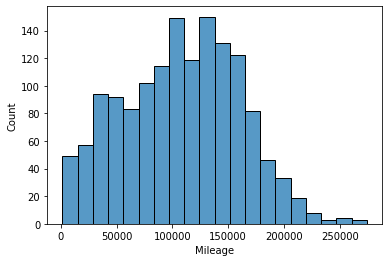

In [ ]:
sns.histplot(df['Mileage'])

##7/10 Condition

Missing Value Condition 6

We can fill the missing values with mod.

In [ ]:
x = df['Condition']
print(x.value_counts(dropna=False))
del x

Accident check\nNo issues reported       1154
Accident check\n1Accident reported        241
Accident check\n2Accidents reported        47
Accident check\n3Accidents reported         8
NaN                                         6
Accident check\nFrame damage reported       2
Accident check\n4Accidents reported         2
Name: Condition, dtype: int64


In [ ]:
df['Condition']
df['Condition'].fillna('Accident check\nNo issues reported',inplace=True)

##8/10 Usage Type

We will replace the missing data by personal usage and Rental, Fleet and Taxi Usage as Commercial Usage.

In [ ]:
df['Usage Type'].value_counts(dropna=False)

NaN           1296
Rental Use     110
Fleet           53
Taxi Use         1
Name: Usage Type, dtype: int64

In [ ]:
df['Usage Type'].replace(np.NaN,'Personal',inplace=True)
df['Usage Type'].replace(['Rental Use', 'Fleet','Taxi Use'],'Commercial',inplace=True)

In [ ]:
df['Usage Type'].value_counts(dropna=False)

Personal      1296
Commercial     164
Name: Usage Type, dtype: int64

##9/10 'Owner#'
Missing value 6

We have only 6 missing value on that feature, 
⚓ Filling with mean is not a good idea beacuse data type is already categorical and mean is a float number.
⚓ The mod is so close to the second and third mod we cant use this either.
So i choose to drop these rows.



In [ ]:
print(df.shape)
print(df['Owner#'].value_counts(dropna=False))
df.dropna(subset=['Owner#'],axis='index',inplace=True)
print(df.shape)

(1460, 8)
1.0    620
2.0    546
3.0    193
4.0     71
5.0     14
6.0      7
NaN      6
8.0      3
Name: Owner#, dtype: int64
(1454, 8)


##10/10 Location
Missing Value 30
Best bet is to drop them.

In [ ]:
df.dropna(subset=['Location'],inplace=True)
print(df.Location.value_counts(dropna=False))
print(df.shape)

CA    330
FL     98
VA     80
TX     73
WA     72
NC     55
IL     54
OH     45
GA     44
MA     43
OR     42
CO     39
PA     37
IN     37
NJ     30
NY     29
MO     28
TN     27
AZ     26
MN     22
MD     20
CT     19
WI     18
SC     17
MI     17
UT     14
NV     12
KS     10
NM     10
IA      9
OK      9
HI      7
AR      6
MT      5
KY      5
NE      5
ID      5
NH      5
AL      4
LA      3
RI      3
WV      2
MS      2
ND      2
WY      1
ME      1
VT      1
SD      1
Name: Location, dtype: int64
(1424, 8)


In [ ]:
#Final Check
print(df.count())
df.isna().value_counts()

Years         1424
Price         1424
Model         1424
Mileage       1424
Condition     1424
Usage Type    1424
Owner#        1424
Location      1424
dtype: int64


Years  Price  Model  Mileage  Condition  Usage Type  Owner#  Location
False  False  False  False    False      False       False   False       1424
dtype: int64

#Defining the X and y variables

#Feature Selection
As x we include all features except vin. We will further investigate which feature contrıbute most to the price and we will continue with these features.

In [ ]:
X = df.iloc[:, [True, False, True, True, True, True, True, True,]]
y = df.iloc[:,1:2]

#Model Selection
We have a good correlation with the numeric values. We can go on with the Linear Regression

            Years     Price   Mileage    Owner#
Years    1.000000  0.912172 -0.708542 -0.372673
Price    0.912172  1.000000 -0.878824 -0.405664
Mileage -0.708542 -0.878824  1.000000  0.373409
Owner#  -0.372673 -0.405664  0.373409  1.000000


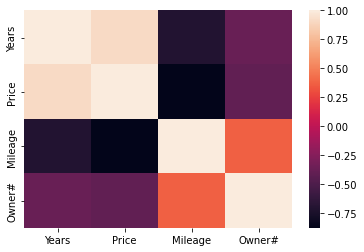

In [ ]:
print(df.corr())
sns.heatmap(df.corr())

#Pair Plots

In [ ]:
df.head(2)

,Years,Price,Model,Mileage,Condition,Usage Type,Owner#,Location
#,,,,,,,,
0,2018,27637,Prius Two FWD,29801,Accident check\nNo issues reported,Personal,2.0,CA
1,2017,24500,Prius Two FWD,16565,Accident check\nNo issues reported,Personal,1.0,CA


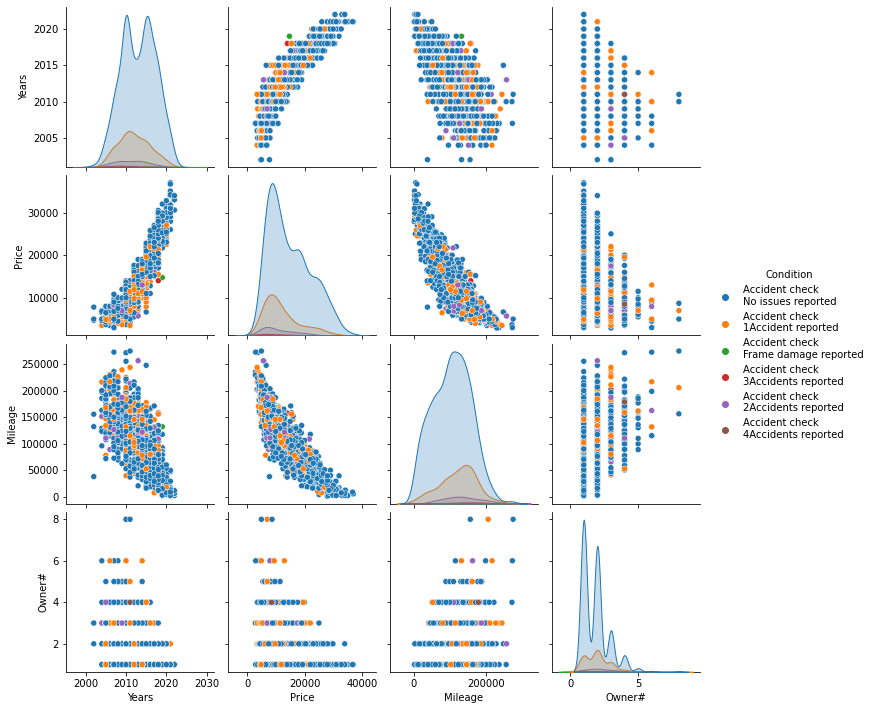

In [ ]:
sns.pairplot(df,hue='Condition')

#Feature Modifying,Scaling,Encoding, and predicting with Linear Regression


#Linear Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

param_grid = dict(reduce_dim__n_components=[2, 5, 10],
                  clf__C=[0.1, 10, 100])
grid_search = GridSearchCV(pipe, param_grid=param_grid)



score = []
numeric_features = ["Years", "Mileage","Owner#"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ["Model", "Condition", "Usage Type" ,"Location"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LinearRegression())]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))
score.append("Linear Regression score is" + str(round(clf.score(X_test,y_test),3)))


from sklearn.model_selection import GridSearchCV
param_grid = dict(reduce_dim__n_components=[2, 5, 10], clf__C=[0.1, 10, 100])
grid_search = GridSearchCV(clf, param_grid=param_grid)
grid_search

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)


print(clf.cv_results_.keys())
clf.cv_results_

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


{'mean_fit_time': array([0.00099602, 0.00100703, 0.00091443, 0.00089254]),
 'mean_score_time': array([0.00047703, 0.00057182, 0.00051861, 0.00046797]),
 'mean_test_score': array([0.98      , 0.96666667, 0.97333333, 0.98      ]),
 'param_C': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'}],
 'rank_test_score': array([1, 4, 3, 1], dtype=int32),
 'split0_test_score': array([0.96666667, 0.96666667, 1.        , 0.96666667]),
 'split1_test_score': array([1.        , 0.96666667, 1.        , 1.        ]),
 'split2_test_score': array([0.96666667, 0.96666667, 0.9       , 0.96666667]),
 'split3_test_score': arra

##Support Vector Regressor

In [ ]:
from sklearn.svm import SVR
numeric_features = ["Years", "Mileage","Owner#"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ["Model", "Condition", "Usage Type" ,"Location"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", SVR())]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))
score.append("SVR Score is" + str(round(clf.score(X_test,y_test),3)))


model score: -0.050


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##DEcision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
numeric_features = ["Years", "Mileage","Owner#"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ["Model", "Condition", "Usage Type" ,"Location"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", DecisionTreeRegressor())]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))
score.append("Decision Tree Regressor Score is" + str(round(clf.score(X_test,y_test),3)))


model score: 0.953


## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
numeric_features = ["Years", "Mileage","Owner#"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ["Model", "Condition", "Usage Type" ,"Location"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", RandomForestRegressor())]
)
clf.steps[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))
score.append("RandomForestRegressor Score is " + str(round(clf.score(X_test,y_test),3)))
score

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


model score: 0.968


['Linear Regression score is0.961',
 'SVR Score is-0.05',
 'Decision Tree Regressor Score is0.953',
 'RandomForestRegressor Score is 0.968']

In [ ]:
clf.n_features_in_
clf.named_steps


{'classifier': RandomForestRegressor(),
 'preprocessor': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('imputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('scaler', StandardScaler())]),
                                  ['Years', 'Mileage', 'Owner#']),
                                 ('cat', OneHotEncoder(handle_unknown='ignore'),
                                  ['Model', 'Condition', 'Usage Type',
                                   'Location'])])}

#Predicting the future

In [ ]:
#input data format must be as follows
X.iloc[:1,:]

,Years,Model,Mileage,Condition,Usage Type,Owner#,Location
#,,,,,,,
0,2018,Prius Two FWD,29801,Accident check\nNo issues reported,Personal,2.0,CA


In [ ]:
#Real Data
y.iloc[:1,:]

,Price
#,
0,27637


In [ ]:
#Predicted result
clf.predict(X)

array([27316.02, 26020.11, 11389.09, ..., 27411.34,  7466.19,  9838.65])

In [ ]:
X.columns

Index(['Years', 'Model', 'Mileage', 'Condition', 'Usage Type', 'Owner#',
       'Location'],
      dtype='object')